In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных**

# Часть 1

Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к

    a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),
    б) равномерному.
Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).


## Нормальное распределение с несмещенной медианой

In [2]:
# Датасет взят с сайта https://www.kaggle.com/datasets/manyregression/updated-wine-enthusiast-review
# Примечание автора оригинальной статьи: "Данные были получены от WineEnthusiast в течение недели с 15 июня 2017 года. 
# Код для парсера можно найти здесь (https://www.kaggle.com/code/crklausenburg/bivariate-plotting-with-pandas)"
df = pd.read_csv('winemag-data-2017-2020.csv')#, index_col='index')

In [3]:
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças


In [4]:
df.info()
# не для всех известна цена. Придется их чистить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  object 
 14  winery                 81115 non-null  object 
dtypes:

In [5]:
# Сопоставление страны и континента
europe = ['Austria', 'Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','England', 'France','Germany','Greece','Italy','Luxembourg','Portugal','Hungary', 'Macedonia', 'Moldova', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Switzerland', 'Turkey', 'Ukraine']
asia = ['Armenia', 'China','India','Israel','Lebanon' ]
northAmerica = ['Canada','US','Mexico']
sudAmerica = ['Argentina',',Brazil','Chile','Peru','Uruguay'] 
oceania = ['Australia','New Zealand'] 
africa = ['South Africa','Morocco']
other = ['Egypt', 'Georgia']

def continentDispacher(row):
    if row['country'] in europe:
        val = 'Europe'
    elif row['country'] in asia:
        val = 'Other'
    elif row['country'] in northAmerica:
        val = 'North America'
    elif row['country'] in sudAmerica:
        val = 'Other'
    elif row['country'] in oceania:
        val = 'Other'
    elif row['country'] in africa:
        val = 'Other'
    else:
        val = 'Other'

    return val

df['continent'] = df.apply(continentDispacher, axis=1)

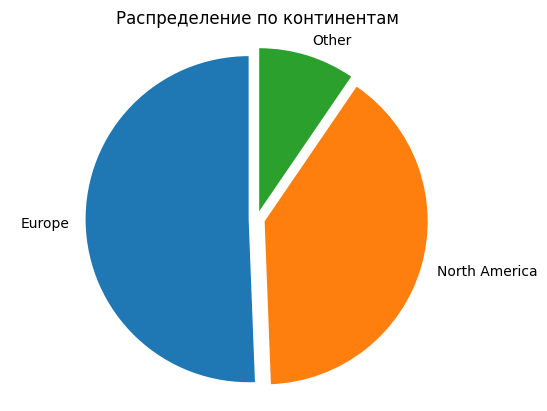

In [6]:
df_continent = df.continent.value_counts()
plt.title('Распределение по континентам')
explode = [0.05,0.05,0.05]
plt.pie(df_continent.values, labels=df_continent.index,explode=explode,startangle=90)
plt.axis("equal")
plt.show()

Распределение похоже на равномерное


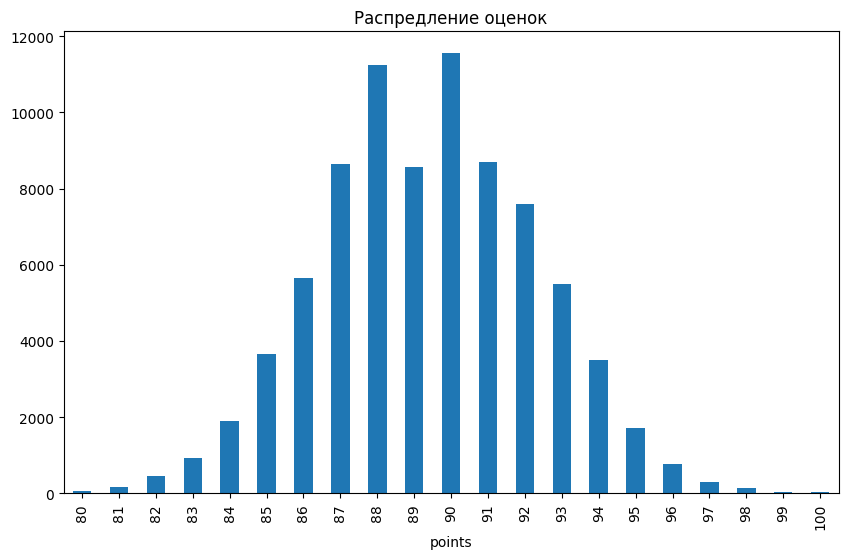

In [7]:
plt.title('Распредление оценок')
ax = df.points.value_counts().sort_index().plot.bar(stacked=False, figsize=(10, 6))

print('Распределение похоже на равномерное')

In [8]:
median_price = round(df.price.dropna().median(), 1)
mean_price =  round(df.price.dropna().mean(), 1)
mode_price =  round(df.price.dropna().mode().values[0], 1)
range_price = round(df.price.dropna().max() - df.price.dropna().min(), 1)
diff = round(100 * abs(mean_price - median_price) / range_price, 1)
print(f'Медианная цена {median_price}, средняя цена {mean_price}, мода {mode_price}')
print(f'Медиана смещена относительно средней на {diff}% размаха')

Медианная цена 29.0, средняя цена 39.2, мода 20.0
Медиана смещена относительно средней на 0.3% размаха


In [9]:
# Топ 5 сортов по количеству
top_5_variety = df.variety.value_counts().head(5).index
df_points_by_variety = df[df['variety'].isin(top_5_variety)].groupby(['points', 'variety']).agg(cnt=('country', 'count')).reset_index().pivot(index='points', columns='variety', values='cnt')

Распределение оценок в зависимости от сорта


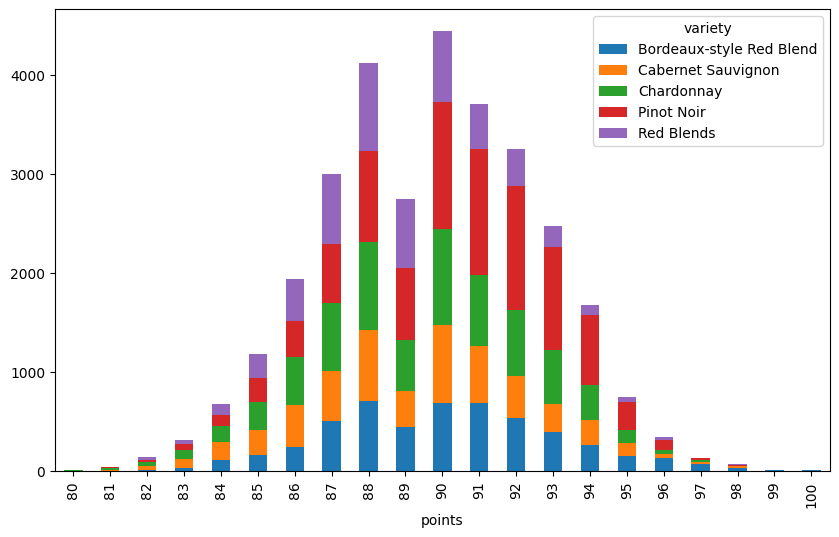

In [10]:
print('Распределение оценок в зависимости от сорта')
df_points_by_variety.plot.bar(stacked=True, figsize=(10, 6))
plt.show()

## Нормальное распределение со смещенной медианой

In [11]:
# Для этого пункта ЛР выбран известный набор данных Boston Housing
df = pd.read_csv('train.csv')
df = df.drop('Id', axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

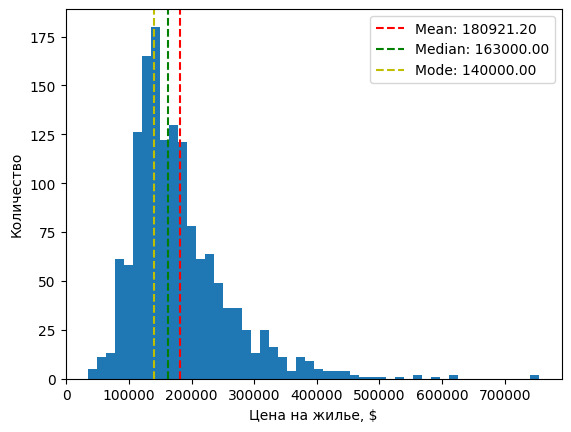

In [13]:
plt.hist(df['SalePrice'], bins=50)
mean_value = df['SalePrice'].mean()
median_value = df['SalePrice'].median()
mode_price =  df.SalePrice.dropna().mode().values[0]
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axvline(x=mode_price, color='y', linestyle='--', label=f'Mode: {mode_price:.2f}')
plt.legend()
plt.xlabel('Цена на жилье, $')
plt.ylabel('Количество');

In [14]:
median_price = round(df.SalePrice.dropna().median(), 1)
mean_price =  round(df.SalePrice.dropna().mean(), 1)
mode_price =  round(df.SalePrice.dropna().mode().values[0], 1)
range_price = round(df.SalePrice.dropna().max() - df.SalePrice.dropna().min(), 1)
diff = round(100 * abs(mean_price - median_price) / range_price, 1)
print(f'Медианная цена {median_price}, средняя цена {mean_price}, мода {mode_price}')
print(f'Медиана смещена относительно средней на {diff}% размаха')

Медианная цена 163000.0, средняя цена 180921.2, мода 140000
Медиана смещена относительно средней на 2.5% размаха


In [15]:
print('''Хоть смещение составляет меньше 15% размаха, распределение имеет длинный правый хвост.
Это связано с тем, что в выборке встречается очень дорогое жилье''')
# Найти на 15% на получилось

Хоть смещение составляет меньше 15% размаха, распределение имеет длинный правый хвост.
Это связано с тем, что в выборке встречается очень дорогое жилье


## Равномерное распределение

In [16]:
# Найти датасет с равномерным распределением сложно, но его можно сгенерировать

Чем больше точек, тем больше расределение становится похоже на равномерное


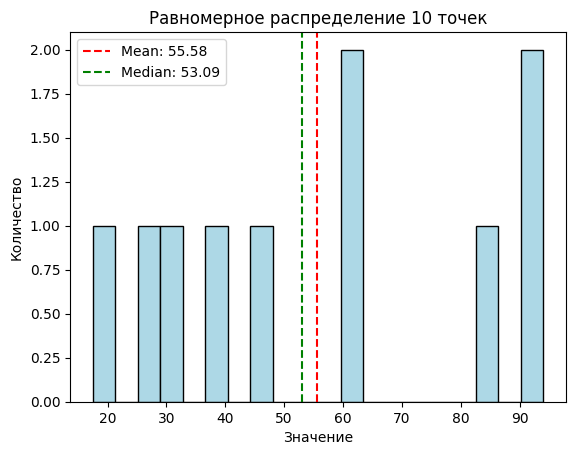

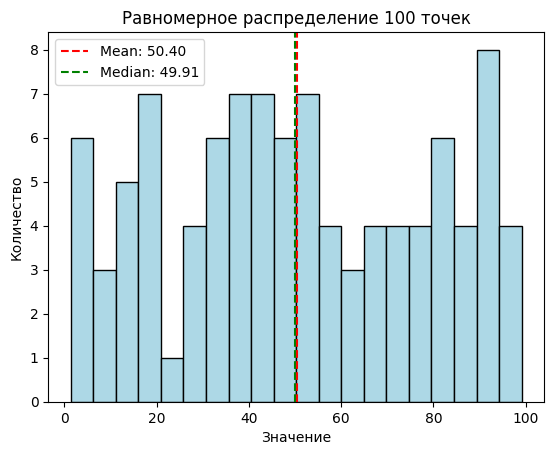

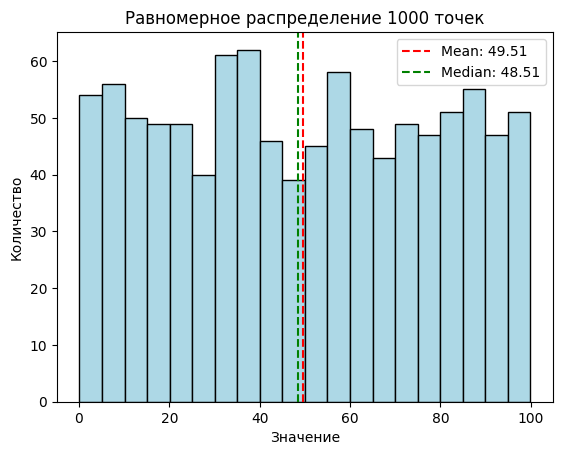

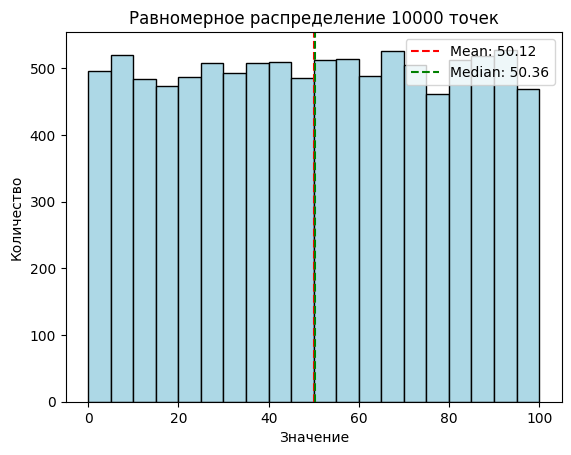

In [18]:
print('Чем больше точек, тем больше расределение становится похоже на равномерное')

for i in [10, 100, 1000, 10000]:
    uniform_data = np.random.uniform(0, 100, size=i)
    df_uniform = pd.DataFrame(uniform_data, columns=['value'])
    mean_value = df_uniform.mean().values[0]
    median_value = df_uniform.median().values[0]

    # Добавление вертикальных линий для среднего и медианы
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(x=median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

    # Построение гистограммы для визуализации распределения
    plt.hist(df_uniform['value'], bins=20, color='lightblue', edgecolor='black')
    plt.legend()
    plt.title(f'Равномерное распределение {i} точек')
    plt.xlabel('Значение')
    plt.ylabel('Количество')
    plt.show()


# Часть 2

Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». 

Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).


In [19]:
import seaborn as sns

In [20]:
# Для этого пункта ЛР выбран известный набор данных Boston Housing
df = pd.read_csv('train.csv')
df = df.drop('Id', axis=1)

In [21]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [22]:
# Уберем года, по которым мало значений в выборке
years = df.YearBuilt.value_counts().reset_index().query('count > 10').YearBuilt.values
df_temp = df[df['YearBuilt'].isin(years)]

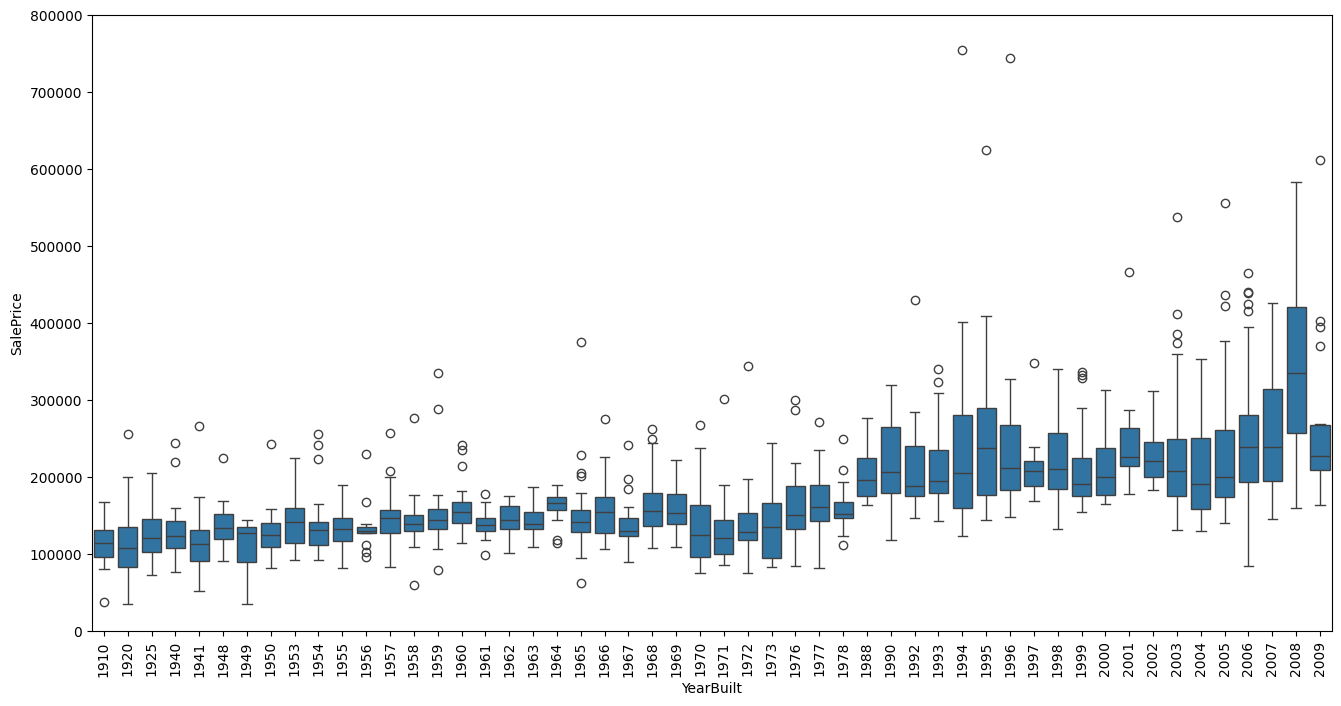

In [23]:
data = pd.concat([df_temp['SalePrice'], df_temp['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [24]:
print('''Прослеживается увеличение стоимости жилья в зависимости от свежести постройки.
Для старых построек характерны выбросы как в сторону уменьшения стоимости, так и в сторону увеличения.
Это может быть связано с сохранностью жилья и с его исторической значимостью''')

Прослеживается увеличение стоимости жилья в зависимости от свежести постройки.
Для старых построек характерны выбросы как в сторону уменьшения стоимости, так и в сторону увеличения.
Это может быть связано с сохранностью жилья и с его исторической значимостью


In [25]:
# OverallQual -  Общее качество материалов и отделки

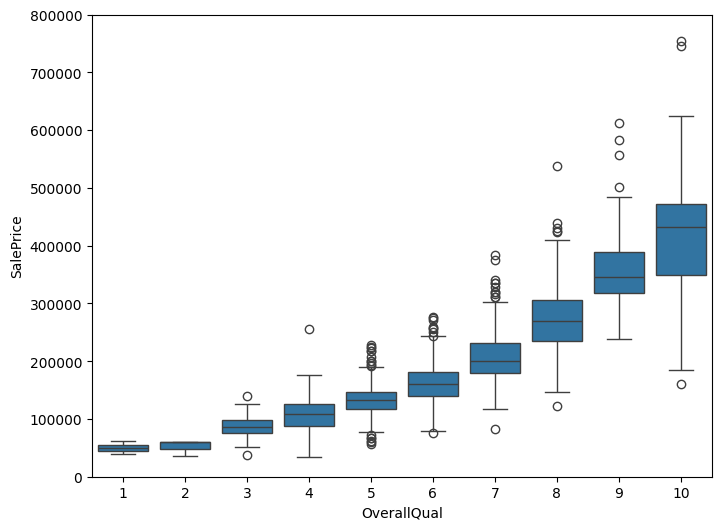

In [26]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [27]:
print('''Качественно отремонтированное жилье стоит заметно дороже.
Много владельцев "средненького" ремонта думают о своем жилье или слишком хорошо, или слишком плохо.
Но это также может быть связано и с дополниельными признаками, такими как год постройки, 
наличия бассейна, количества комнат и т.п.''')

Качественно отремонтированное жилье стоит заметно дороже.
Много владельцев "средненького" ремонта думают о своем жилье или слишком хорошо, или слишком плохо.
Но это также может быть связано и с дополниельными признаками, такими как год постройки, 
наличия бассейна, количества комнат и т.п.


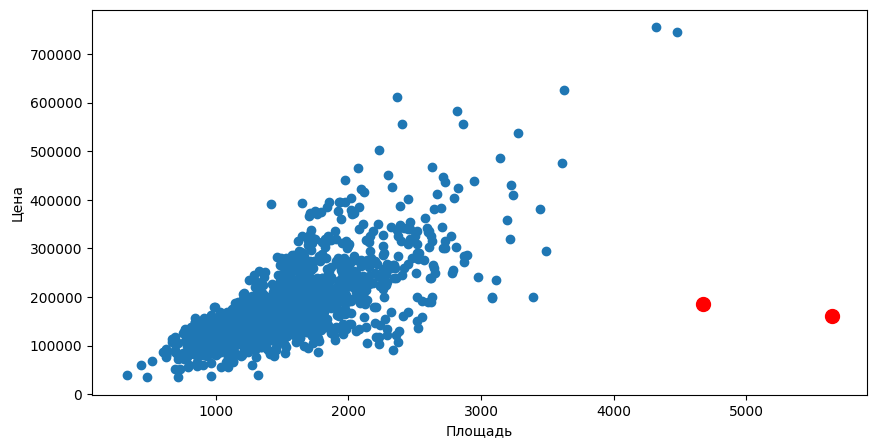

In [28]:
plt.figure(figsize=(10, 5))
v = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.scatter(v['GrLivArea'], v['SalePrice'], c='r', s=100)
plt.xlabel('Площадь')
plt.ylabel('Цена');

In [29]:
print('''Цена зависит от площади достаточно линейно.
Есть два выделяющихся значения в выборке.
Возможно это два здоровенных ангара в промзоне, заросших травой''')

Цена зависит от площади достаточно линейно.
Есть два выделяющихся значения в выборке.
Возможно это два здоровенных ангара в промзоне, заросших травой
